<a href="https://colab.research.google.com/github/aichaoukdour/Deep-LearningMANET-IDS/blob/main/Intrusion_Detection_System_for_Mobile_Ad_Hoc_Networks_(MANETs)_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **Description :**

  Mobile Ad Hoc Networks (MANETs) are decentralized, self-configuring networks where mobile devices communicate without fixed infrastructure. Due to their dynamic nature and lack of centralized security, MANETs are highly vulnerable to Denial of Service (DoS) attacks and other cyber threats.

This project aims to develop an Intrusion Detection System (IDS) using Deep Learning (LSTM) to detect DoS attacks in MANETs. The LSTM (Long Short-Term Memory) model, a type of recurrent neural network (RNN), is particularly effective in identifying attack patterns in network traffic over time.

 ***Exemple Simple d’un MANET :***

Imagine que tu es avec des amis dans une zone sans réseau (ex: en forêt). Vous pouvez former un MANET en utilisant Bluetooth ou WiFi Direct :

A ↔ B ↔ C (si A et C sont trop loin, B sert de relais pour transmettre les messages entre eux).
Pas besoin de routeur, chaque mobile gère lui-même les connexions.

## **Phase 1: Data Collection & Preprocessing**

We'll start by loading and preprocessing a dataset for training the LSTM-based anomaly detection system. Since you're working on DoS attacks in MANETs, we'll use the NSL-KDD dataset as an example, which contains network traffic labeled as normal or attack.

https://github.com/aichaoukdour/Deep-LearningMANET-IDS.git

## you can upload the dataset files directly

In [6]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the files


Saving Final Dataset.csv to Final Dataset.csv


**Load the Dataset in Colab**

 load the dataset using pandas

In [7]:
import pandas as pd

# Replace 'your_dataset.csv' with the name of your uploaded dataset file
data = pd.read_csv('Final Dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Node,Mobility,Mobility_speed,packet_Received,packet_Sent,Forwarding_Difference,Energy,num_Received,num_Sent,packet_Drop,Transmission_Power,Attack_type,Type_of_node
0,R0,RandomWayPoint,4,37,10,161,-1.138122,1217,1056,0,1.4,Normal,Normal
1,R1,RandomWayPoint,4,26,2,0,-0.198993,0,0,0,1.4,Normal,Normal
2,R2,RandomWayPoint,4,34,4,0,-0.206068,0,0,0,1.4,Normal,Normal
3,R3,RandomWayPoint,4,21,2,0,-0.164678,0,0,0,1.4,Normal,Normal
4,R4,RandomWayPoint,4,17,2,0,-0.168908,0,0,0,1.4,Normal,Normal


**Preprocess the Dataset**

Extract Features and Labels:

Identify which columns represent the network traffic features (e.g., packet size, number of packets) and which column represents the labels (e.g., attack type, DoS or normal).

In [9]:
X = data.drop('Attack_type', axis=1)  # Drop the 'Attack_type' column (this will be your label)
y = data['Attack_type']  # 'Attack_type' will be the label column


In [10]:
print(data.columns)


Index(['Node', 'Mobility', 'Mobility_speed', 'packet_Received', 'packet_Sent',
       'Forwarding_Difference', 'Energy', 'num_Received', 'num_Sent',
       'packet_Drop', 'Transmission_Power', 'Attack_type', 'Type_of_node'],
      dtype='object')


**Converting categorical columns**

It looks like the dataset has some categorical columns like Mobility and Type_of_node. These should be encoded numerically for your LSTM model to process them.

You can use LabelEncoder to convert these columns into numerical values:

In [15]:
X = data.drop(['Attack_type', 'Node'], axis=1)  # Drop 'Attack_type' and 'Node'


In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()

X['Mobility'] = le.fit_transform(X['Mobility'])
X['Type_of_node'] = le.fit_transform(X['Type_of_node'])


**Scaling the features**

It’s good practice to scale your features so that they are on a similar range, especially when using deep learning models like LSTM.

In [19]:
from sklearn.preprocessing import StandardScaler

# Scale the features (excluding the label column)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Proceed with Train-Test Split and Model Training**

After scaling, you can split the dataset and train the LSTM model as before.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Reshape the data for LSTM**

As mentioned earlier, reshape the data for LSTM input:

In [35]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


**Train the LSTM Model**

In [48]:
# Modify the model for multi-class classification
model = Sequential()

# Add LSTM layer with 64 units
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))

# Add a Dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Add a Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 4 units (since we have 4 classes) and softmax activation
model.add(Dense(4, activation='softmax'))  # 4 classes for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 64)                  │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,668 (84.64 KB)

 Trainable params: 21,668 (84.64 KB)

 Non-trainable params: 0 (0.00 B)

**Convert Data to Numeric**

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit and transform y_train and y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Check the data types again
print(y_train.dtype)  # Should now be 'int'
print(y_test.dtype)   # Should now be 'int'


int64
int64


**Try Training Again**

In [50]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3471 - loss: 1.3641 - val_accuracy: 0.5077 - val_loss: 1.2737
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5037 - loss: 1.2503 - val_accuracy: 0.5077 - val_loss: 1.1411
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5253 - loss: 1.1183 - val_accuracy: 0.5055 - val_loss: 1.0297
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5069 - loss: 1.0297 - val_accuracy: 0.5077 - val_loss: 0.9683
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5225 - loss: 0.9698 - val_accuracy: 0.5429 - val_loss: 0.9343
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5467 - loss: 0.9405 - val_accuracy: 0.5363 - val_loss: 0.9083
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5511 - loss: 0.9135 - val_accuracy: 0.5495 - val_loss: 0.8898
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5398 - loss: 0.9257 - val_accuracy: 0.5451 - val_loss

In [60]:
print(X_train.dtype)
print(y_train.dtype)
print(X_train.shape)


float64
int64
(1820, 1, 11)


In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5615 - loss: 0.8308 
Test Accuracy: 0.5429


In [52]:
predictions = model.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


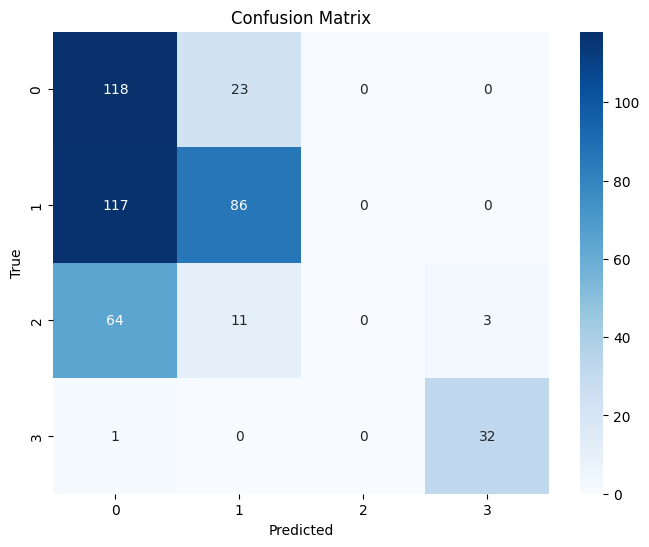

In [57]:
# Convert y_pred to class labels by taking the index of the maximum probability for each sample
y_pred_class = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Off-Diagonal Values (Misclassifications):

The off-diagonal cells show the misclassifications, where a sample from a certain class is predicted as another class.
For example, Class 0 has 23 misclassified as Class 1, and Class 1 has 117 misclassified as Class 0.
Understanding these errors can help you identify which classes are commonly confused by your model.



# **RandomForestClassifier**

In [67]:
# Reshape X_test to 2D if necessary
X_test = X_test.reshape(X_test.shape[0], -1)

# Predict using the trained model
y_pred = rf_model.predict(X_test)


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Now you can initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)





RandomForestClassifier(random_state=42)

In [69]:
y_pred = rf_model.predict(X_test)


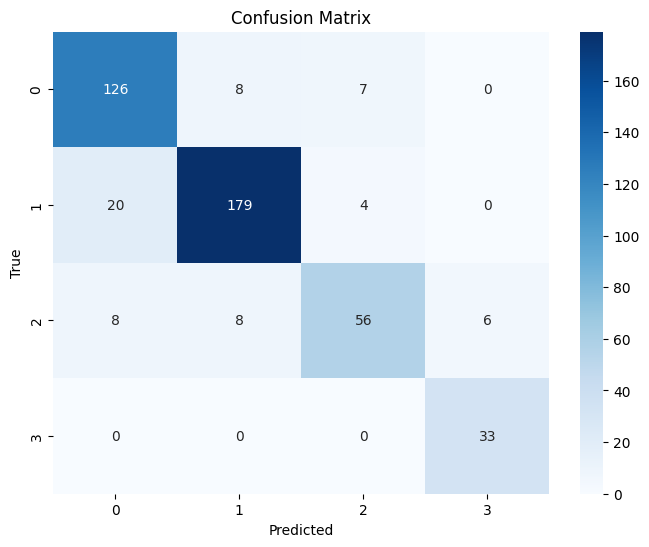

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **FeedBacks**

For your machine learning model lab, here are some key points you should note and consider for your learning and deductions:

**1. Data Preparation and Preprocessing:**


Feature Selection: Ensure you selected relevant features for your model. This helps improve the model's performance and prevents overfitting.
Data Splitting: You’ve split the data into training and testing sets. This is crucial for model validation to avoid overfitting and ensure the model generalizes well.
Normalization/Standardization: If not already done, consider standardizing or normalizing your features. Models like kNN and SVM are sensitive to the scale of the data.

**2. Model Evaluation:**


Confusion Matrix: The confusion matrix allows you to visually see the performance of the model, especially how well it performs on each class (precision, recall).
Accuracy: While accuracy is important, it might not give you the full picture if your dataset is imbalanced. Focus on other metrics like precision, recall, F1 score, and ROC-AUC.
Model Selection: You've tried different models (Random Forest, KNN, XGBoost). Each model has its strengths:
Random Forest: Robust to overfitting, works well with default parameters.
KNN: Sensitive to feature scaling and distance metrics.
XGBoost: Great for complex datasets, works well with large datasets and improves with hyperparameter tuning.

**3. Interpretability:**


Confusion Matrix Interpretation: Focus on the diagonal elements. The higher the values in these cells, the better your model's performance. Misclassifications are visible in off-diagonal cells.
Precision and Recall: A model can have high accuracy, but look at precision (how many predicted positives are actually positive) and recall (how many actual positives are correctly predicted). These metrics are crucial for evaluating performance.

**4. Overfitting/Underfitting:**


Check if the model is overfitting (high performance on training data but poor on test data) or underfitting (poor performance on both).
You may want to adjust the complexity of the model (e.g., adjusting tree depth in Random Forest or increasing the number of neighbors in KNN).

**5. Model Performance:**


XGBoost: If XGBoost works well, consider tuning hyperparameters for even better performance. XGBoost has several parameters (learning rate, max depth, etc.) that, when tuned, can significantly improve accuracy.
Comparison: After running multiple models, compare their performances. The best model will depend on accuracy, precision, recall, and how well the model generalizes.

**6. Next Steps:**


Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters of the models and improve performance.
Ensemble Methods: Consider combining multiple models (e.g., stacking or boosting) to leverage the strengths of each model.
Cross-Validation: For better validation, use cross-validation to ensure the model performs consistently across different subsets of the data.

# **Conclusion:**


After experimenting with different models, you should conclude which model best suits your data. Document the results from each model’s evaluation metrics, including the confusion matrix, accuracy, precision, and recall.
If your dataset is imbalanced, be cautious of models that may favor the majority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights can help.